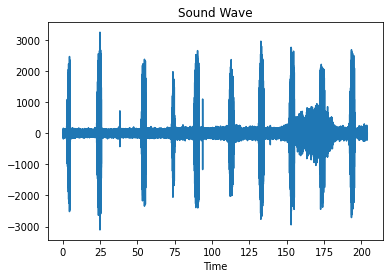

In [1]:
"""
https://community-app.topcoder.com/thrive/articles/audio-data-analysis-using-python

Bext classification tool - get a library of sounds classified into directories
https://github.com/tyiannak/pyAudioAnalysis
"""
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import wave


def visualize(path: str):
    command = ["ffmpeg", "-hide_banner", "-loglevel", "panic", "-i", path,
               "-f", "wav", "-"]
    converter = subprocess.Popen(command, stdout=subprocess.PIPE)
    raw = wave.open(converter.stdout, 'r')
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype="int16")
    f_rate = raw.getframerate()
    time = np.linspace(
        0,  # start
        len(signal) / f_rate,
        num=len(signal)
    )
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(time, signal)
    plt.show()


if __name__ == "__main__":
    path = "./quietbird.ogg"
    visualize(path)